In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import itertools
import collections
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [140]:
data = json.load(open('minilotto_data_api.json'))
df = pd.DataFrame(data["items"])


In [141]:
df.columns.unique()
df.info()
flatten = pd.json_normalize(df['results'])
flatten_again = pd.json_normalize(flatten[0])
flaten_more = flatten_again['resultsJson']
flat_list = itertools.chain.from_iterable(flaten_more)
list(flat_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6720 entries, 0 to 6719
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   drawSystemId          6720 non-null   int64 
 1   drawDate              6720 non-null   object
 2   gameType              6720 non-null   object
 3   multiplierValue       6720 non-null   int64 
 4   results               6720 non-null   object
 5   showSpecialResults    6720 non-null   bool  
 6   isNewEuroJackpotDraw  6720 non-null   bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 275.8+ KB


[33,
 42,
 17,
 35,
 3,
 35,
 6,
 19,
 14,
 33,
 22,
 10,
 9,
 8,
 15,
 27,
 3,
 20,
 5,
 38,
 24,
 4,
 16,
 6,
 23,
 25,
 37,
 4,
 40,
 33,
 36,
 10,
 33,
 6,
 42,
 33,
 7,
 26,
 9,
 41,
 42,
 13,
 28,
 23,
 26,
 31,
 8,
 25,
 39,
 17,
 26,
 8,
 22,
 42,
 37,
 30,
 35,
 33,
 16,
 20,
 36,
 42,
 12,
 16,
 1,
 27,
 24,
 31,
 23,
 15,
 19,
 35,
 42,
 29,
 11,
 1,
 19,
 18,
 20,
 14,
 7,
 37,
 17,
 30,
 9,
 17,
 5,
 35,
 36,
 30,
 3,
 12,
 15,
 31,
 11,
 35,
 7,
 30,
 36,
 15,
 39,
 1,
 13,
 42,
 28,
 32,
 1,
 40,
 11,
 30,
 34,
 38,
 15,
 17,
 29,
 25,
 4,
 18,
 42,
 12,
 30,
 21,
 26,
 41,
 15,
 35,
 22,
 25,
 29,
 12,
 33,
 34,
 32,
 25,
 12,
 41,
 19,
 9,
 2,
 29,
 39,
 41,
 7,
 37,
 13,
 7,
 36,
 35,
 15,
 24,
 7,
 18,
 29,
 20,
 41,
 41,
 11,
 1,
 32,
 42,
 30,
 15,
 41,
 9,
 3,
 7,
 11,
 14,
 26,
 6,
 7,
 3,
 29,
 35,
 39,
 4,
 40,
 31,
 18,
 5,
 26,
 21,
 31,
 39,
 25,
 31,
 11,
 10,
 26,
 38,
 37,
 35,
 29,
 38,
 40,
 1,
 15,
 14,
 11,
 9,
 11,
 35,
 10,
 32,
 1,
 32,
 30,
 21,
 

In [142]:
lotto_results = df[["results"]].copy()

In [143]:
# lotto_results.head()
df_results = pd.DataFrame(lotto_results["results"])
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6720 entries, 0 to 6719
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   results  6720 non-null   object
dtypes: object(1)
memory usage: 52.6+ KB


In [144]:
unpacked_df = df_results.explode('results').reset_index(drop=True)
unpacked_df = unpacked_df.join(pd.json_normalize(unpacked_df.pop('results')))
unpacked_df["resultsJson"] = unpacked_df["resultsJson"].apply(sorted)
# unpacked_df["drawSystemId"] = unpacked_df["drawSystemId"].apply(int)

In [145]:
unpacked_df

,drawDate,drawSystemId,gameType,resultsJson,specialResults
0,2024-09-22T22:00:00Z,6720.0,MiniLotto,"[3, 17, 33, 35, 42]",[]
1,2024-09-21T22:00:00Z,6719.0,MiniLotto,"[6, 14, 19, 33, 35]",[]
2,2024-09-20T22:00:00Z,6718.0,MiniLotto,"[8, 9, 10, 15, 22]",[]
3,2024-09-19T22:00:00Z,6717.0,MiniLotto,"[3, 5, 20, 27, 38]",[]
4,2024-09-18T22:00:00Z,6716.0,MiniLotto,"[4, 6, 16, 23, 24]",[]
...,...,...,...,...,...
9082,1976-07-28T00:00:00Z,5.0,MiniLotto,"[10, 22, 23, 29, 41]",[]
9083,1976-06-09T00:00:00Z,4.0,MiniLotto,"[2, 12, 38, 43, 49]",[]
9084,1976-05-12T00:00:00Z,3.0,MiniLotto,"[3, 9, 28, 33, 46]",[]
9085,1976-04-28T00:00:00Z,2.0,MiniLotto,"[31, 36, 37, 42, 48]",[]


In [146]:
lotto = unpacked_df.loc[(unpacked_df.gameType == "MiniLotto")].copy()
lotto["resultsJson"] = lotto["resultsJson"].apply(sorted)
# lotto["drawSystemId"] = lotto["drawSystemId"].apply(int)

In [147]:
start_date = '1994-09-16'
end_date = '2024-09-16'
lotto = lotto[(lotto['drawDate'] >= start_date) & (lotto['drawDate'] <= end_date)]
lotto

,drawDate,drawSystemId,gameType,resultsJson,specialResults
7,2024-09-15T22:00:00Z,6713.0,MiniLotto,"[7, 9, 26, 33, 41]",[]
8,2024-09-14T22:00:00Z,6712.0,MiniLotto,"[13, 23, 26, 28, 42]",[]
9,2024-09-13T22:00:00Z,6711.0,MiniLotto,"[8, 17, 25, 31, 39]",[]
10,2024-09-12T22:00:00Z,6710.0,MiniLotto,"[8, 22, 26, 37, 42]",[]
11,2024-09-11T22:00:00Z,6709.0,MiniLotto,"[16, 20, 30, 33, 35]",[]
...,...,...,...,...,...
8135,1994-10-19T00:00:00Z,952.0,MiniLotto,"[2, 5, 6, 10, 41]",[]
8136,1994-10-12T00:00:00Z,951.0,MiniLotto,"[3, 23, 31, 37, 38]",[]
8137,1994-10-05T00:00:00Z,950.0,MiniLotto,"[2, 5, 15, 33, 36]",[]
8138,1994-09-28T00:00:00Z,949.0,MiniLotto,"[16, 19, 20, 23, 37]",[]


FREQUENCY ANALYSIS OF NUMBERS

In [148]:
# Flatten the sets into a single list
all_numbers = [num for subset in lotto["resultsJson"] for num in subset]

# Count frequencies
frequency_counts = collections.Counter(all_numbers)

# Convert the Counter to a DataFrame for better visualization
frequency_df = pd.DataFrame(frequency_counts.items(), columns=['Number', 'Frequency'])

# Sort by frequency
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

frequency_df
type(frequency_df)

pandas.core.frame.DataFrame

ANALYSIS OF PAIRS OF NUMBERS  IN TERMS OF FREQUENCY

In [149]:
def extract_combinations(data, r):
    combs = []
    for s in data:
        combs.extend(itertools.combinations(s, r))
    return combs

# Extract triplets
pairs = extract_combinations(lotto["resultsJson"], 2)

# Count frequencies
pair_counts = collections.Counter(pairs)

# Convert to DataFrames for better visualization
pair_df = pd.DataFrame(pair_counts.items(), columns=['Pair', 'Frequency'])

# Sort by frequency
pair_df = pair_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
pair_df

,Pair,Frequency
0,"(36, 42)",96
1,"(7, 32)",91
2,"(21, 36)",91
3,"(7, 20)",89
4,"(9, 41)",89
...,...,...
856,"(35, 40)",46
857,"(20, 39)",46
858,"(3, 38)",46
859,"(6, 20)",45


ANALYSIS OF TRIPLETS OF NUMBERS IN TERMS OF FREQUENCY

In [150]:
def extract_combinations(data, r):
    combs = []
    for s in data:
        combs.extend(itertools.combinations(s, r))
    return combs

# Extract triplets
triplets = extract_combinations(lotto["resultsJson"], 3)

# Count frequencies
triplet_counts = collections.Counter(triplets)

# Convert to DataFrames for better visualization
triplet_df = pd.DataFrame(triplet_counts.items(), columns=['Triplet', 'Frequency'])

# Sort by frequency
triplet_df = triplet_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
triplet_df

,Triplet,Frequency
0,"(12, 36, 42)",16
1,"(4, 5, 21)",14
2,"(3, 25, 35)",14
3,"(18, 24, 28)",14
4,"(4, 14, 21)",14
...,...,...
11391,"(18, 22, 40)",1
11392,"(14, 20, 26)",1
11393,"(14, 25, 30)",1
11394,"(4, 19, 35)",1


ANALYSIS OF QUARTET OF NUMBERS IN TERMS OF FREQUENCY

In [151]:
def extract_combinations(data, r):
    combs = []
    for s in data:
        combs.extend(itertools.combinations(s, r))
    return combs

# Extract triplets
quartets = extract_combinations(lotto["resultsJson"], 4)

# Count frequencies
quartet_counts = collections.Counter(quartets)

# Convert to DataFrames for better visualization
quartet_df = pd.DataFrame(quartet_counts.items(), columns=['Triplet', 'Frequency'])

# Sort by frequency
quartet_df = quartet_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
quartet_df

,Triplet,Frequency
0,"(13, 16, 26, 31)",5
1,"(2, 5, 16, 42)",4
2,"(9, 18, 40, 42)",4
3,"(6, 7, 34, 41)",4
4,"(2, 7, 10, 35)",4
...,...,...
25369,"(14, 28, 37, 41)",1
25370,"(12, 28, 37, 41)",1
25371,"(12, 14, 28, 37)",1
25372,"(19, 22, 24, 36)",1


ANALYSIS OF QUINTET OF NUMBERS IN TERMS OF FREQUENCY

In [152]:
def extract_combinations(data, r):
    combs = []
    for s in data:
        combs.extend(itertools.combinations(s, r))
    return combs

# Extract triplets
quintets = extract_combinations(lotto["resultsJson"], 5)

# Count frequencies
quintet_counts = collections.Counter(quintets)

# Convert to DataFrames for better visualization
quintet_df = pd.DataFrame(quintet_counts.items(), columns=['Quintet', 'Frequency'])

# Sort by frequency
quintet_df = quintet_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
quintet_df

,Quintet,Frequency
0,"(7, 12, 15, 23, 28)",2
1,"(7, 17, 27, 34, 36)",2
2,"(6, 8, 17, 30, 35)",2
3,"(2, 16, 35, 36, 39)",2
4,"(3, 11, 15, 25, 36)",2
...,...,...
5742,"(4, 7, 11, 38, 41)",1
5743,"(14, 22, 25, 35, 42)",1
5744,"(1, 18, 27, 40, 42)",1
5745,"(4, 6, 8, 13, 33)",1


STATISTICS FOR NUMBER DRAWN

In [153]:
# Expand the DataFrame according to frequencies
freqs = frequency_df['Frequency']

# Calculate statistics
mean = freqs.mean()
median = freqs.median()
mode = freqs.mode()[0] if not freqs.mode().empty else None
std_dev = freqs.std()
range_values = freqs.max() - freqs.min()

# Create a DataFrame to display the results
stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Standard Deviation', 'Range'],
    'Value': [mean, median, mode, std_dev, range_values]
})

print(stats_df)

            Statistic       Value
0                Mean  686.428571
1              Median  680.500000
2                Mode  678.000000
3  Standard Deviation   24.868574
4               Range  127.000000


In [154]:
# Convert drawDate to datetime
lotto['drawDate'] = pd.to_datetime(lotto['drawDate'])

# Function to calculate hot and cold numbers within a specified date range
def calculate_hot_cold_numbers(start_date, end_date):
    # Filter data within the specified date range
    filtered_data = lotto[(lotto['drawDate'] >= start_date) & (lotto['drawDate'] <= end_date)]
    
    # Flatten the list of results into a single list of numbers
    all_numbers = list(itertools.chain.from_iterable(filtered_data['resultsJson']))
    
    # Count frequencies of each number
    frequency_counts = collections.Counter(all_numbers)
    
    # Convert the Counter to a DataFrame for better visualization
    frequency_df = pd.DataFrame(frequency_counts.items(), columns=['Number', 'Frequency'])
    
    # Sort by frequency
    sorted_frequency_df = frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
    
    # Hot numbers (most frequent)
    hot_numbers = sorted_frequency_df.head()
    
    # Cold numbers (least frequent)
    cold_numbers = sorted_frequency_df.tail()
    
    return hot_numbers, cold_numbers

In [169]:
hot, cold = calculate_hot_cold_numbers('2012-02-09', '2024-09-23')

In [170]:
hot

,Number,Frequency
0,36,549
1,4,533
2,21,517
3,12,516
4,33,516


In [157]:
cold

,Number,Frequency
37,8,441
38,1,440
39,17,440
40,20,428
41,38,427


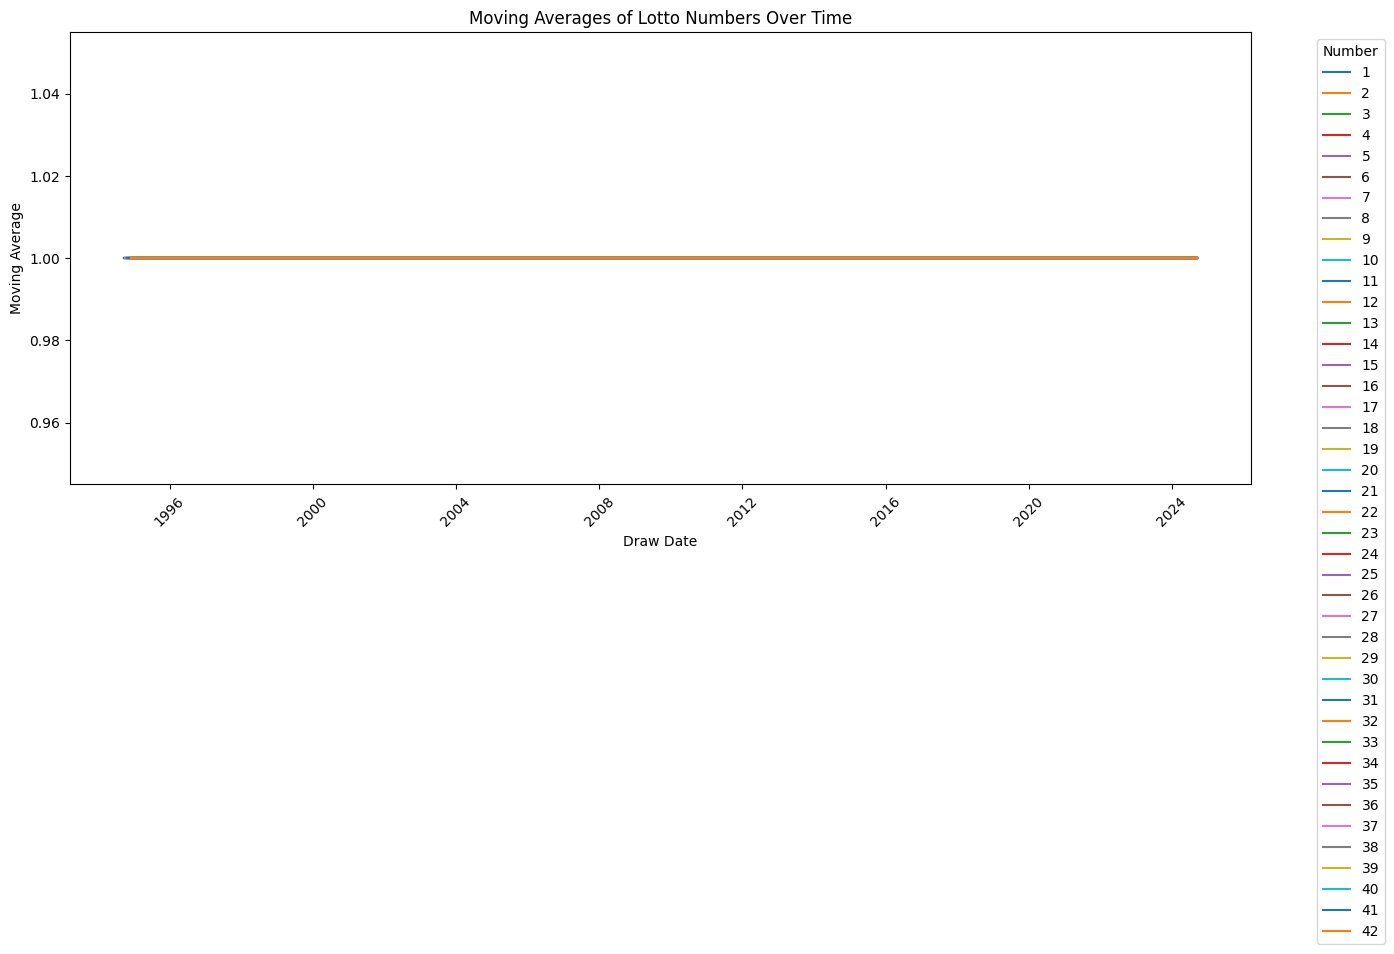

In [158]:

# Convert drawDate to datetime
lotto['drawDate'] = pd.to_datetime(lotto['drawDate'])

# Expand the resultsJson into a long format DataFrame
expanded_data = lotto.explode('resultsJson').reset_index(drop=True)
expanded_data = expanded_data.rename(columns={'resultsJson': 'Number'})

# Define the window size for the moving average
window_size = 3

# Calculate the moving average for each number
expanded_data['Count'] = 1
expanded_data = expanded_data.groupby(['Number', 'drawDate']).count().reset_index()
expanded_data['Moving_Avg'] = expanded_data.groupby('Number')['Count'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Plotting the moving averages using seaborn and matplotlib
plt.figure(figsize=(14, 8))
sns.lineplot(data=expanded_data, x='drawDate', y='Moving_Avg', hue='Number', palette='tab10')
plt.title('Moving Averages of Lotto Numbers Over Time')
plt.xlabel('Draw Date')
plt.ylabel('Moving Average')
plt.legend(title='Number', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

Even/Odd Distribution: Analyze the distribution of even and odd numbers in each draw.

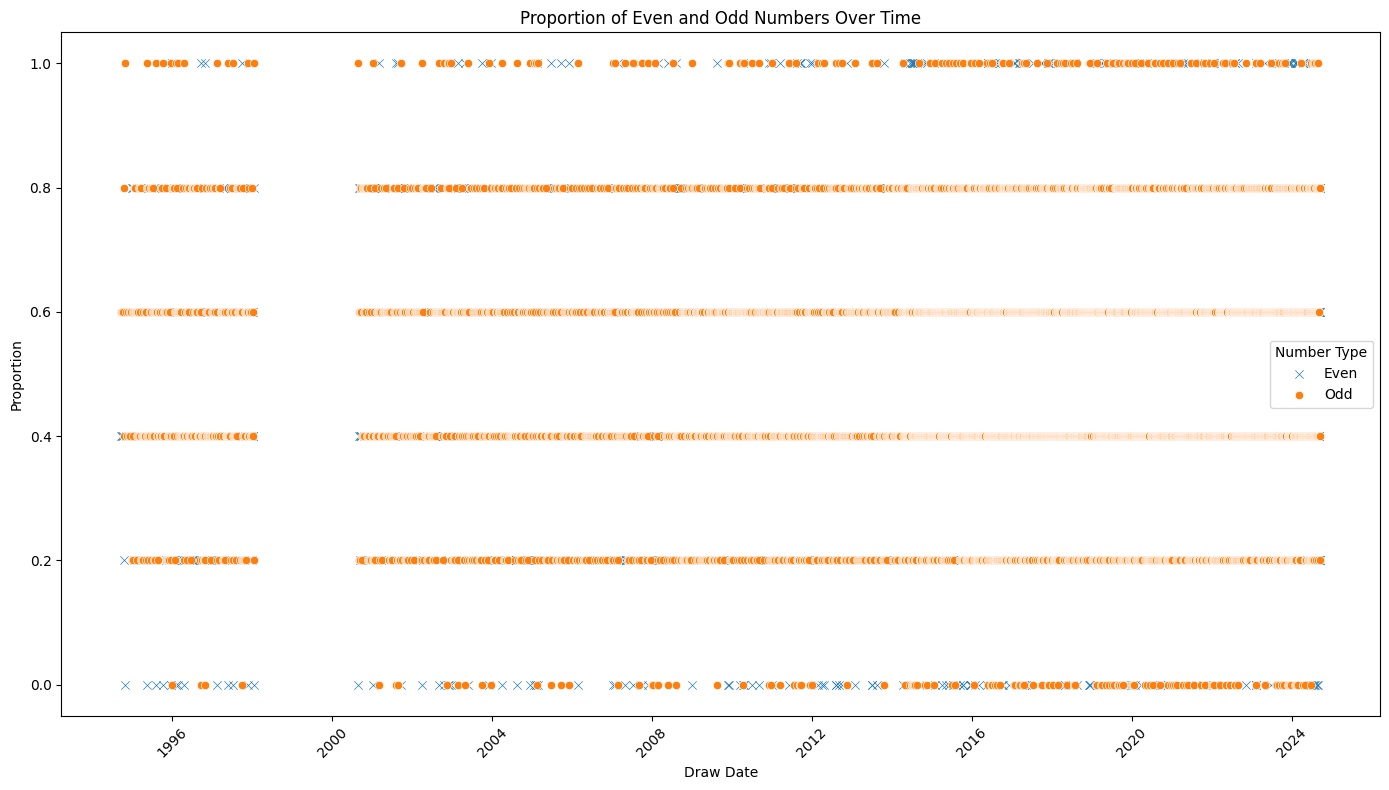

In [159]:
# Expand the resultsJson into a long format DataFrame
expanded_data = lotto.explode('resultsJson').reset_index(drop=True)
expanded_data = expanded_data.rename(columns={'resultsJson': 'Number'})

# Identify each number as even or odd
expanded_data['EvenOdd'] = expanded_data['Number'].apply(lambda x: 'Even' if x % 2 == 0 else 'Odd')

# Calculate the proportion of even and odd numbers for each draw
even_odd_distribution = expanded_data.groupby(['drawDate', 'EvenOdd']).size().unstack(fill_value=0)
even_odd_distribution['Total'] = even_odd_distribution.sum(axis=1)
even_odd_distribution['EvenProportion'] = even_odd_distribution['Even'] / even_odd_distribution['Total']
even_odd_distribution['OddProportion'] = even_odd_distribution['Odd'] / even_odd_distribution['Total']

# Reset index for plotting
even_odd_distribution = even_odd_distribution.reset_index()

# Plotting the even and odd distribution using seaborn and matplotlib
plt.figure(figsize=(14, 8))
sns.scatterplot(data=even_odd_distribution, x='drawDate', y='EvenProportion', label='Even', marker='x')
sns.scatterplot(data=even_odd_distribution, x='drawDate', y='OddProportion', label='Odd', marker='o')
plt.title('Proportion of Even and Odd Numbers Over Time')
plt.xlabel('Draw Date')
plt.ylabel('Proportion')
plt.legend(title='Number Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

It's not clear let's seperate graphs for even and odd numbers

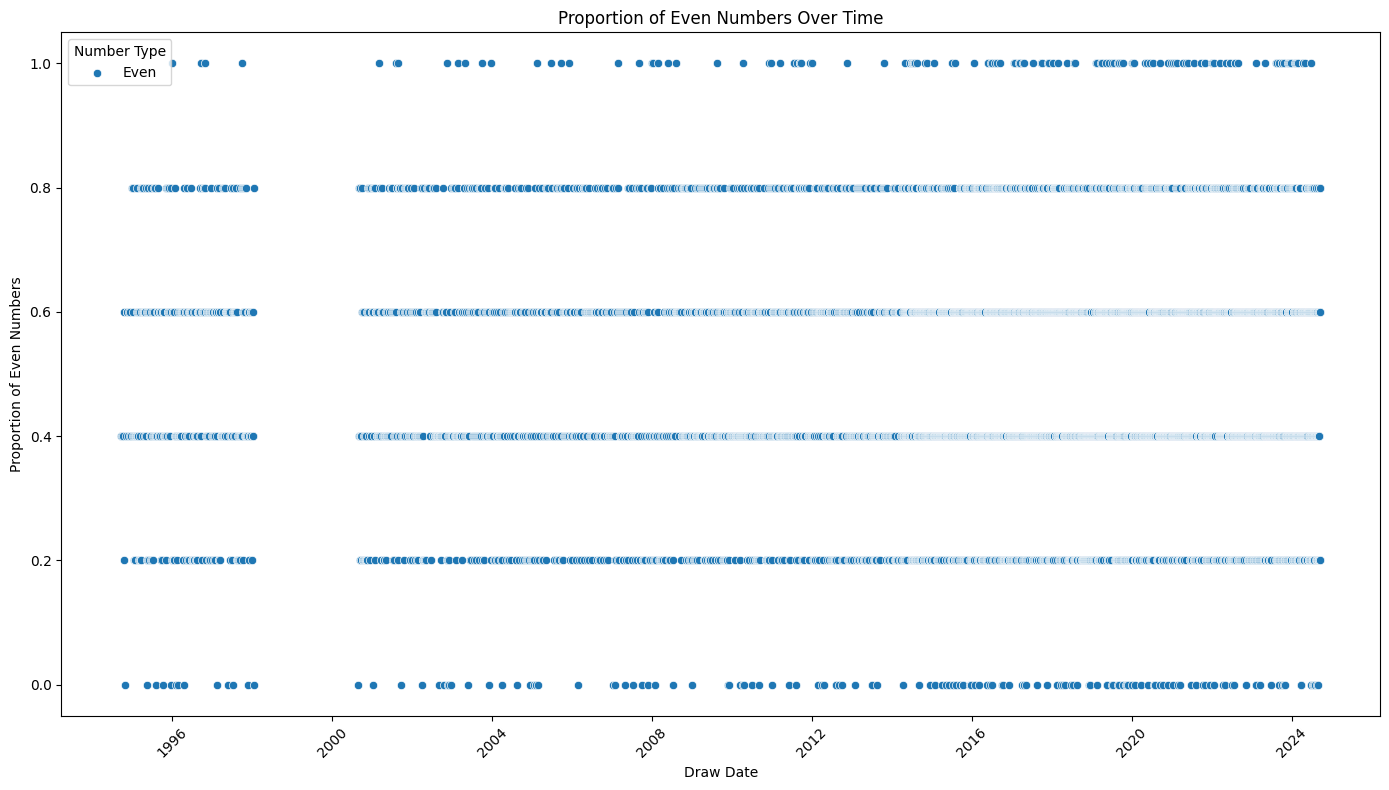

In [160]:
# Plotting the even distribution using seaborn and matplotlib
plt.figure(figsize=(14, 8))
sns.scatterplot(data=even_odd_distribution, x='drawDate', y='EvenProportion', label='Even', marker='o')
plt.title('Proportion of Even Numbers Over Time')
plt.xlabel('Draw Date')
plt.ylabel('Proportion of Even Numbers')
plt.legend(title='Number Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Show even number plot
plt.show()

doing the same for odd numbers is not necessary this information

Probability of getting a majority of High numbers: 0.31
Probability of getting a majority of Low numbers: 0.69


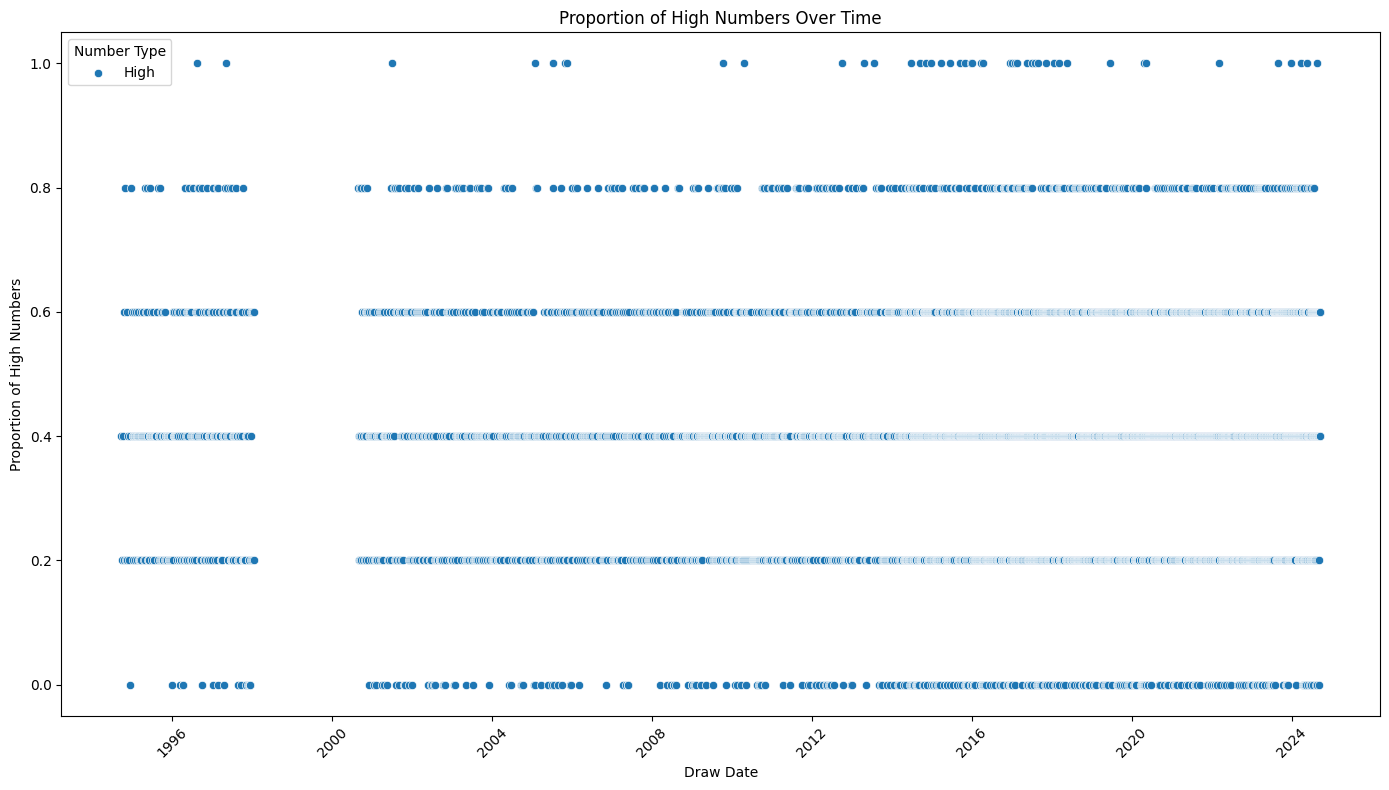

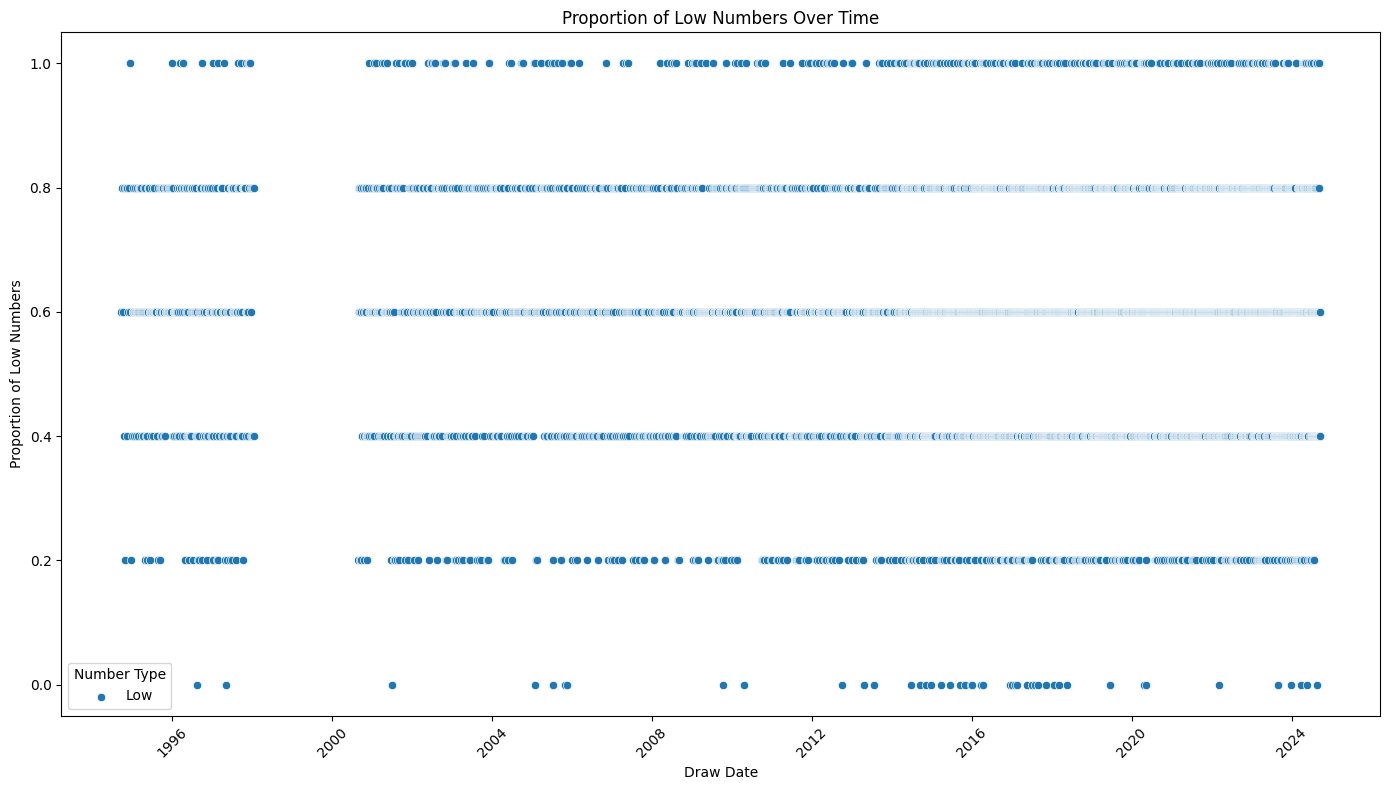

In [161]:
# Expand the resultsJson into a long format DataFrame
expanded_data = lotto.explode('resultsJson').reset_index(drop=True)
expanded_data = expanded_data.rename(columns={'resultsJson': 'Number'})

# Identify each number as high or low
expanded_data['HighLow'] = expanded_data['Number'].apply(lambda x: 'High' if x > 25 else 'Low')

# Calculate the count of high and low numbers for each draw
high_low_distribution = expanded_data.groupby(['drawDate', 'HighLow']).size().unstack(fill_value=0)
high_low_distribution['Total'] = high_low_distribution.sum(axis=1)
high_low_distribution['HighProportion'] = high_low_distribution['High'] / high_low_distribution['Total']
high_low_distribution['LowProportion'] = high_low_distribution['Low'] / high_low_distribution['Total']

# Determine the draws where the majority of numbers come from one of the groups
high_low_distribution['Majority'] = high_low_distribution.apply(lambda row: 'High' if row['High'] > row['Low'] else ('Low' if row['Low'] > row['High'] else 'Tie'), axis=1)

# Calculate the probability of getting a majority from one of the groups
total_draws = len(high_low_distribution)
majority_high = (high_low_distribution['Majority'] == 'High').sum()
majority_low = (high_low_distribution['Majority'] == 'Low').sum()

probability_majority_high = majority_high / total_draws
probability_majority_low = majority_low / total_draws

# Display the results
print(f"Probability of getting a majority of High numbers: {probability_majority_high:.2f}")
print(f"Probability of getting a majority of Low numbers: {probability_majority_low:.2f}")

# Plotting the high/low distribution using seaborn and matplotlib
plt.figure(figsize=(14, 8))
sns.scatterplot(data=high_low_distribution, x=high_low_distribution.index, y='HighProportion', label='High', marker='o')
plt.title('Proportion of High Numbers Over Time')
plt.xlabel('Draw Date')
plt.ylabel('Proportion of High Numbers')
plt.legend(title='Number Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.scatterplot(data=high_low_distribution, x=high_low_distribution.index, y='LowProportion', label='Low', marker='o')
plt.title('Proportion of Low Numbers Over Time')
plt.xlabel('Draw Date')
plt.ylabel('Proportion of Low Numbers')
plt.legend(title='Number Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Consecutive Numbers in Each Draw:
                      drawDate   gameType           resultsJson   
7    2024-09-15 22:00:00+00:00  MiniLotto    [7, 9, 26, 33, 41]  \
8    2024-09-14 22:00:00+00:00  MiniLotto  [13, 23, 26, 28, 42]   
9    2024-09-13 22:00:00+00:00  MiniLotto   [8, 17, 25, 31, 39]   
10   2024-09-12 22:00:00+00:00  MiniLotto   [8, 22, 26, 37, 42]   
11   2024-09-11 22:00:00+00:00  MiniLotto  [16, 20, 30, 33, 35]   
...                        ...        ...                   ...   
8135 1994-10-19 00:00:00+00:00  MiniLotto     [2, 5, 6, 10, 41]   
8136 1994-10-12 00:00:00+00:00  MiniLotto   [3, 23, 31, 37, 38]   
8137 1994-10-05 00:00:00+00:00  MiniLotto    [2, 5, 15, 33, 36]   
8138 1994-09-28 00:00:00+00:00  MiniLotto  [16, 19, 20, 23, 37]   
8139 1994-09-21 00:00:00+00:00  MiniLotto  [17, 19, 20, 30, 31]   

        ConsecutiveNumbers  
7                       []  
8                       []  
9                       []  
10                      []  
11              

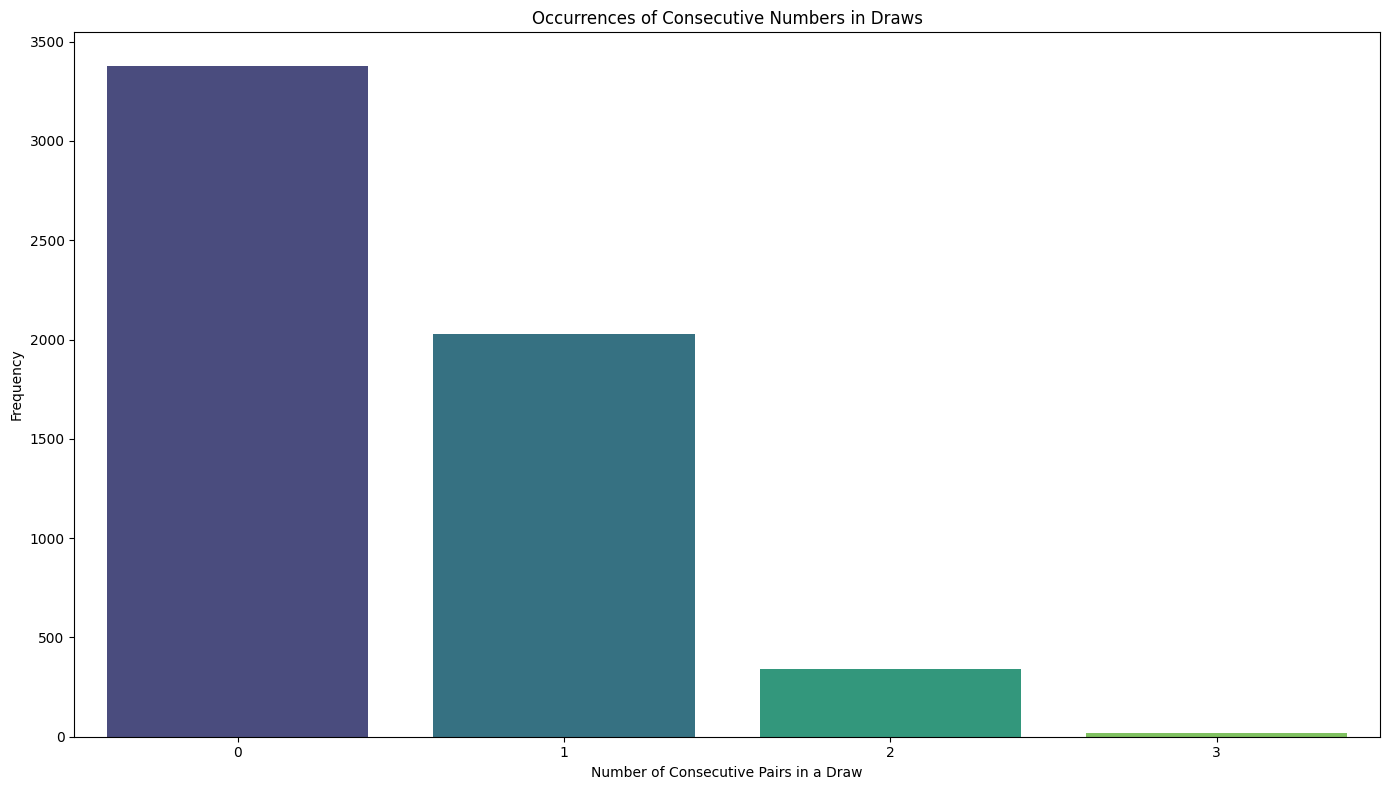

In [162]:
# Function to identify consecutive numbers
def find_consecutive_numbers(numbers):
    numbers.sort()
    consecutive = []
    for i in range(len(numbers) - 1):
        if numbers[i+1] == numbers[i] + 1:
            consecutive.append((numbers[i], numbers[i+1]))
    return consecutive

# Apply the function to each draw and store the results
lotto['ConsecutiveNumbers'] = lotto['resultsJson'].apply(find_consecutive_numbers)

# Count the occurrences of consecutive numbers
consecutive_counts = lotto['ConsecutiveNumbers'].apply(len).value_counts().sort_index()

# Display the results
print("Consecutive Numbers in Each Draw:")
print(lotto[['drawDate', 'gameType', 'resultsJson', 'ConsecutiveNumbers']])
print("\nCount of Consecutive Number Occurrences:")
print(consecutive_counts)

# Plotting the consecutive number occurrences using seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(x=consecutive_counts.index, y=consecutive_counts.values, palette='viridis')
plt.title('Occurrences of Consecutive Numbers in Draws')
plt.xlabel('Number of Consecutive Pairs in a Draw')
plt.ylabel('Frequency')
plt.tight_layout()

# Show plot
plt.show()

Summary Statistics of Sums:
count    5766.000000
mean      107.292404
std        25.674880
min        28.000000
25%        90.000000
50%       107.000000
75%       125.000000
max       188.000000
Name: Sum, dtype: float64


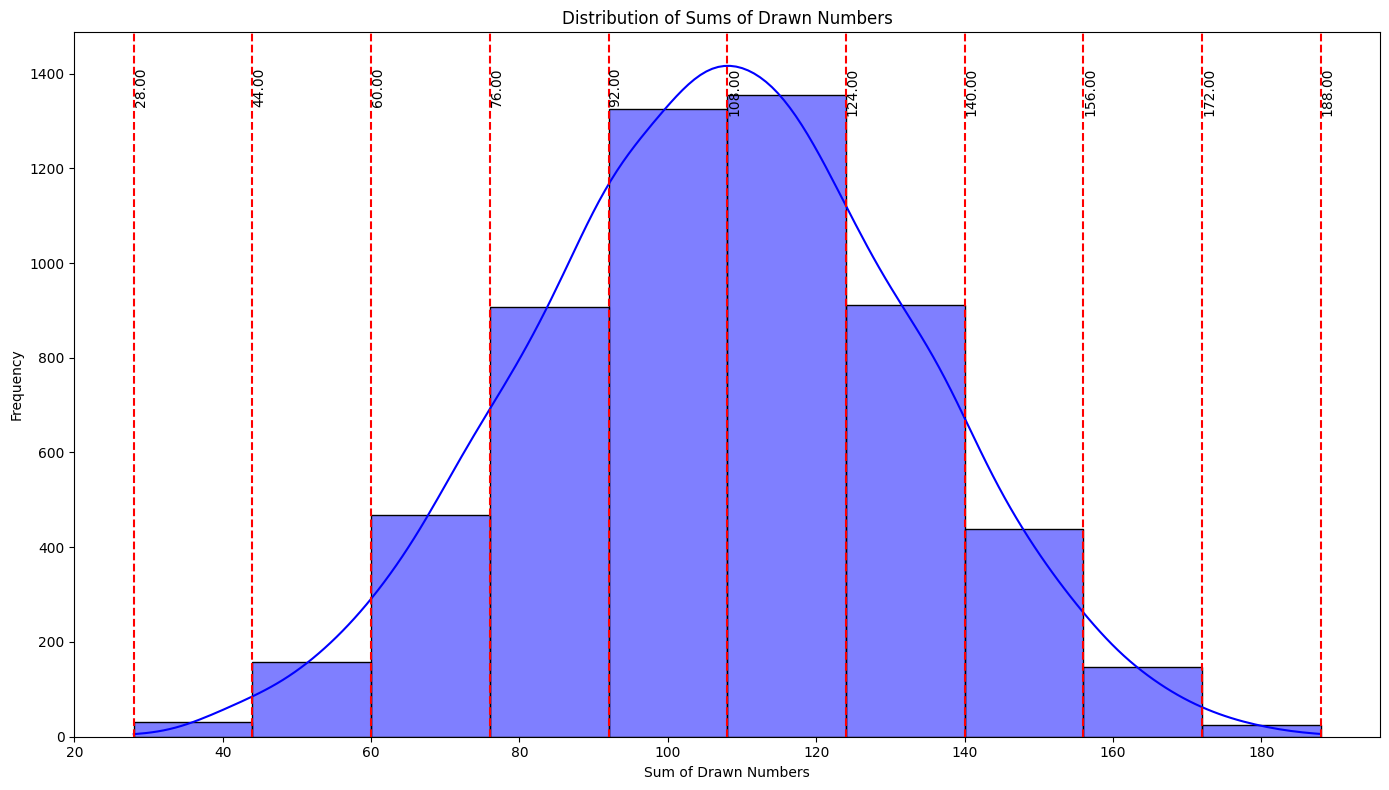

In [171]:
# Calculate the sum of drawn numbers for each draw
lotto['Sum'] = lotto['resultsJson'].apply(sum)

# Analyze the distribution of these sums
sum_stats = lotto['Sum'].describe()
print("Summary Statistics of Sums:")
print(sum_stats)
hist, bin_edges = np.histogram(lotto['Sum'], bins=10)
# Plotting the distribution of sums using seaborn and matplotlib
plt.figure(figsize=(14, 8))
sns.histplot(lotto['Sum'], bins=10, kde=True, color='blue')
plt.title('Distribution of Sums of Drawn Numbers')
plt.xlabel('Sum of Drawn Numbers')
plt.ylabel('Frequency')
plt.tight_layout()

# Annotate the plot with the bin edges
for edge in bin_edges:
    plt.axvline(edge, color='red', linestyle='--')
    plt.text(edge, plt.ylim()[1] * 0.95, f'{edge:.2f}', rotation=90, verticalalignment='top')

# Show plot
plt.show()

This gives us pretty cool results.
We can observe now that most of the draws sum of numbers is between 92 and 124.

Chi-Square Statistic: 18.249256733388204
P-Value: 0.9991911535750951


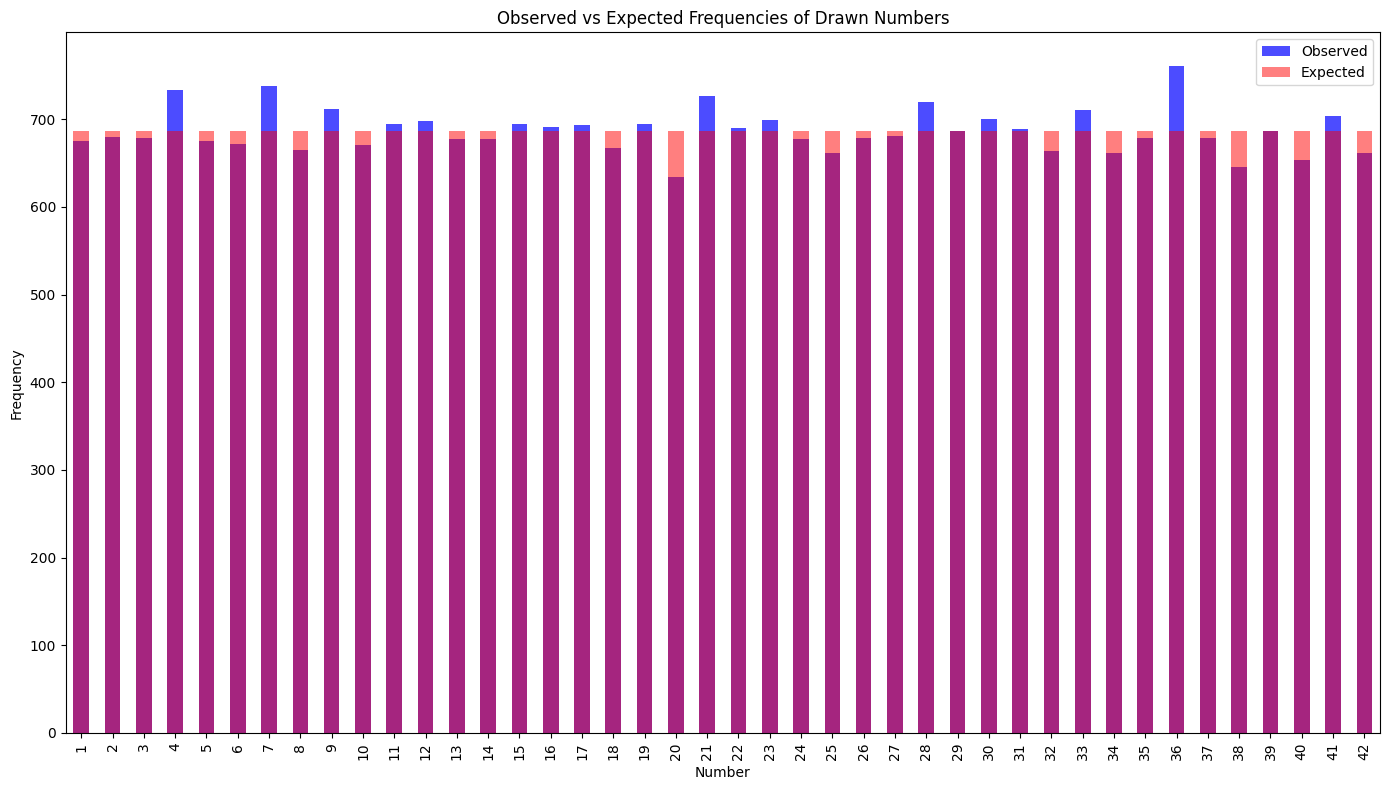

In [164]:
# Flatten the resultsJson into a single list of numbers
all_numbers = [num for sublist in lotto['resultsJson'] for num in sublist]

# Calculate the observed frequencies
observed_frequencies = pd.Series(all_numbers).value_counts().sort_index()
# Calculate the expected frequencies assuming a uniform distribution
total_numbers_drawn = sum(len(results) for results in lotto['resultsJson'])  # Total number of numbers drawn
unique_numbers = observed_frequencies.index
expected_frequency = total_numbers_drawn / len(unique_numbers)
expected_frequencies = pd.Series([expected_frequency] * len(unique_numbers), index=unique_numbers)

# Perform Chi-Square Test
chi2, p_value = chi2_contingency([observed_frequencies, expected_frequencies])[:2]

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

# Plotting the observed and expected frequencies
plt.figure(figsize=(14, 8))
observed_frequencies.plot(kind='bar', color='blue', alpha=0.7, label='Observed')
expected_frequencies.plot(kind='bar', color='red', alpha=0.5, label='Expected')
plt.title('Observed vs Expected Frequencies of Drawn Numbers')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

now correlation

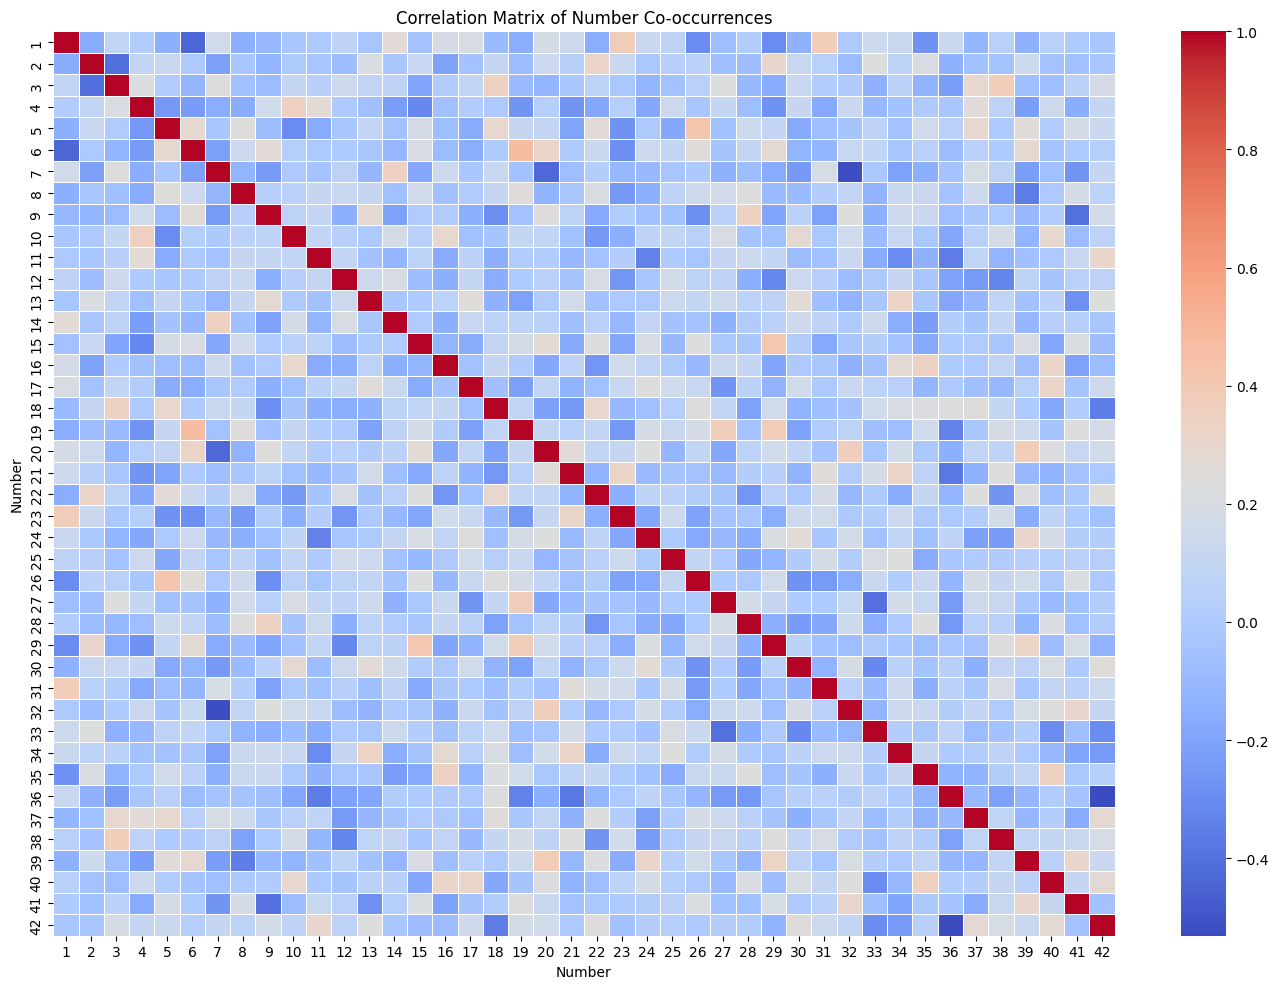

In [165]:
draws = lotto['resultsJson'].tolist()

# Create a list of all unique numbers
all_numbers = sorted(set(num for draw in draws for num in draw))

# Create a co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(0, index=all_numbers, columns=all_numbers)

for draw in draws:
    for num1, num2 in itertools.combinations(draw, 2):
        co_occurrence_matrix.loc[num1, num2] += 1
        co_occurrence_matrix.loc[num2, num1] += 1

# Calculate the correlation matrix, filling NaN with 0
correlation_matrix = co_occurrence_matrix.corr().fillna(0)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Number Co-occurrences')
plt.xlabel('Number')
plt.ylabel('Number')
plt.tight_layout()

# Show plot
plt.show()

In [166]:
# Print the 32 most correlated number pairs
correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
correlation_pairs = correlation_pairs[correlation_pairs < 1]  # Remove self-correlation
top_32_pairs = correlation_pairs.drop_duplicates().head(32)
print(top_32_pairs)

19  6     0.464585
26  5     0.424497
29  15    0.409928
19  29    0.381962
39  20    0.380872
31  1     0.374716
38  3     0.373426
27  19    0.370867
23  1     0.369688
20  32    0.365784
10  4     0.359586
7   14    0.348927
35  40    0.348293
18  3     0.346705
16  35    0.336958
28  9     0.336922
13  34    0.330139
29  39    0.325062
6   20    0.323732
17  40    0.323583
2   22    0.323132
34  21    0.320002
23  21    0.316862
40  16    0.313252
24  39    0.307457
39  41    0.304151
41  32    0.304077
29  2     0.303056
42  11    0.300655
5   18    0.299808
18  22    0.298018
10  40    0.293287
dtype: float64


FIND SET

In [167]:
def check_combination(draws, combination):
    from itertools import combinations

    # Convert the draws to sets for easier comparison
    draw_sets = [set(draw) for draw in draws]
    combination_set = set(combination)

    # Check if the exact combination is in the draws
    if combination_set in draw_sets:
        return "The exact combination occurs in the draws."

    # Find combinations where only one number is different
    close_matches = []
    for draw_set in draw_sets:
        # If the difference between the draw set and the combination set is 1
        if len(combination_set - draw_set) == 1:
            close_matches.append(sorted(draw_set))
    
    if close_matches:
        return f"Combinations with only one number different: {close_matches}"

    return "There are none of such kinds."

# Example combination to check
combination = [2, 7, 20, 25, 37]

# Check the combination
result = check_combination(draws, combination)
print(result)


Combinations with only one number different: [[2, 13, 20, 25, 37]]


GENERATE DRAWS

In [176]:
import random

def generate_random_lottery_draws(num_draws):
    """
    Generate a given number of random lottery draws.
    
    Each draw consists of 5 unique numbers from 1 to 42, with no replacement.
    
    Args:
    num_draws (int): The number of lottery draws to generate.
    
    Returns:
    list of lists: A list containing the generated lottery draws.
    """
    draws = []
    
    # Generate the required number of draws
    while len(draws) < 50:
        draw = random.sample(range(1, 43), 5)  # Pick 5 numbers from 1 to 42 without replacement
        draw.sort()  # Sort the numbers in ascending order (optional, but common in lotteries)
        if sum(draw) >= 92 and sum(draw) <= 124:
            draws.append(draw)
    
    return draws

# Example: Generate 10 random lottery draws
num_draws = 50
random_draws = generate_random_lottery_draws(num_draws)

# Display the generated random draws
for i, draw in enumerate(random_draws, 1):
    print(f"Draw {i}: {draw}")


Draw 1: [1, 15, 25, 31, 42]
Draw 2: [2, 12, 22, 31, 38]
Draw 3: [9, 12, 28, 36, 39]
Draw 4: [3, 7, 21, 25, 40]
Draw 5: [6, 20, 27, 29, 38]
Draw 6: [11, 14, 23, 24, 31]
Draw 7: [18, 20, 24, 25, 29]
Draw 8: [3, 5, 20, 31, 42]
Draw 9: [4, 12, 20, 25, 40]
Draw 10: [7, 15, 16, 31, 36]
Draw 11: [1, 17, 18, 26, 30]
Draw 12: [2, 14, 19, 25, 33]
Draw 13: [6, 15, 18, 29, 38]
Draw 14: [13, 16, 18, 19, 37]
Draw 15: [4, 7, 27, 34, 41]
Draw 16: [9, 17, 24, 28, 38]
Draw 17: [1, 14, 17, 32, 34]
Draw 18: [1, 27, 28, 31, 36]
Draw 19: [9, 16, 21, 34, 42]
Draw 20: [2, 22, 24, 29, 31]
Draw 21: [12, 13, 16, 39, 42]
Draw 22: [9, 16, 18, 35, 41]
Draw 23: [4, 16, 19, 23, 38]
Draw 24: [11, 13, 17, 18, 42]
Draw 25: [7, 17, 18, 19, 36]
Draw 26: [1, 2, 22, 28, 41]
Draw 27: [2, 13, 18, 27, 42]
Draw 28: [3, 14, 27, 38, 41]
Draw 29: [10, 13, 20, 36, 40]
Draw 30: [6, 15, 19, 31, 42]
Draw 31: [2, 7, 20, 37, 38]
Draw 32: [4, 9, 13, 33, 39]
Draw 33: [7, 11, 26, 34, 41]
Draw 34: [10, 13, 21, 35, 36]
Draw 35: [12, 15, 24, 